In [37]:
import matplotlib.pyplot as plt
from findfile import find_result_files
import glob
file_dir='output/5/0.1'
algorithms1=['FedKDMRV3'
             ,'FedAvg'
            ,'FedMR_'
            # ,'FedKDMRV3'
            # ,'FedKDMRV11'
            # ,'FedKDMRV12'
            # ,'FedKDMRV21'
            # ,'FedKDMRV22'
            ,'FedCodl_'
            ,'FedProx'
            # ,'FedExP'
            # ,'FedMRwG'
            # ,'FedKDMR_d'
            # ,'Fed2WKDMRV3'
            # ,'Fed2Codl_revise'
           ]
other1=['cifar100_','test_acc','pre_50','KD_',]
# algorithms2=['FedAvg'
#             # ,'FedKDMRV21'
#              ,'FedMR'
#              # ,'FedKDMRV3'
            
#            ]
# other2=['cifar100_','test_acc','pre_50']
file_list1=find_result_files(file_dir,algorithms1,other1)
# file_list2=find_result_files(file_dir,algorithms2,other2)
# file_list=file_list1+file_list2
file_list=file_list1
print(len(file_list))
print(file_list)
plt.figure(figsize=(10, 6))

5
['output/5/0.1/fashion-mnist_FedMR_resnet20_test_acc_2000_lr_0.01_2025_05_12_22_48_09_frac_0.1_100_pre_50_KD_0.5_T_2.0.txt', 'output/5/0.1/fashion-mnist_FedKDMRV3_resnet20_test_acc_2000_lr_0.01_2025_05_13_03_29_08_frac_0.1_100_pre_50_KD_0.5_T_2.0.txt', 'output/5/0.1/fashion-mnist_FedAvg_resnet20_test_acc_2000_lr_0.01_2025_05_13_07_11_24_frac_0.1_100_pre_50_KD_0.5_T_2.0.txt', 'output/5/0.1/fashion-mnist_FedCodl_resnet20_test_acc_2000_lr_0.01_2025_05_13_23_21_44_frac_0.1_100_pre_50_KD_0.5_T_2.0.txt', 'output/5/0.1/fashion-mnist_FedProx_resnet20_test_acc_2000_lr_0.01_2025_05_14_06_21_27_frac_0.1_100_pre_50_KD_0.5_T_2.0.txt']


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

5
图表已保存至: output/results/noniid/cifar100_test_acc_noniid_0.1.pdf


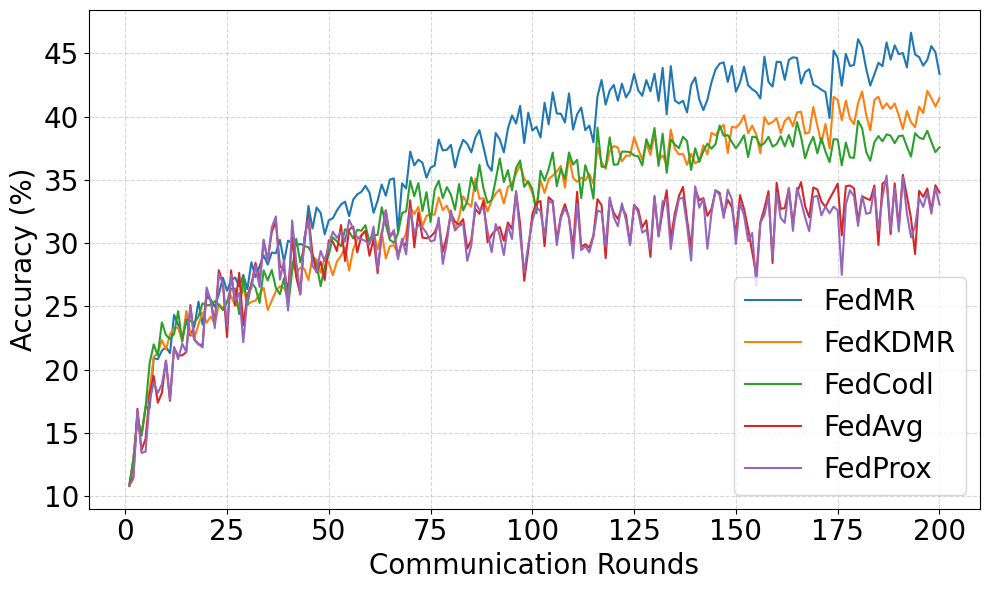

In [12]:
import matplotlib.pyplot as plt
from findfile import find_result_files
import os
import glob
file_dir='output/5/0.1'
save_dir = 'output/results/noniid'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
name= save_dir.split('/')[-1]+'_'+file_dir.split('/')[-1]
# name= save_dir.split('/')[-1]
algorithms1=['FedKDMRV3'
             ,'FedAvg'
            ,'FedMR_'
            # ,'FedKDMRV3'
            # ,'FedKDMRV11'
            # ,'FedKDMRV12'
            # ,'FedKDMRV21'
            # ,'FedKDMRV22'
            ,'FedCodl_'
            ,'FedProx'
            # ,'FedExP'
            # ,'FedMRwG'
            # ,'FedKDMR_d'
            # ,'Fed2WKDMRV3'
            # ,'Fed2Codl_revise'
           ]
other1=['cifar100_','test_acc','pre_50','KD_0.5_T_',]
algorithms2=['FedAvg'
            # ,'FedKDMRV21'
             ,'FedMR'
             # ,'FedKDMRV3'
        
           ]
other2=['cifar10_','test_acc','pre_50']
file_list1=find_result_files(file_dir,algorithms1,other1)
file_list2=find_result_files(file_dir,algorithms2,other2)
# file_list=file_list1+file_list2

file_list=file_list1
print(len(file_list))
if not os.path.exists(save_dir):
    os.makedirs(save_dir)  


filename = f"{other1[0].strip('_')}_{other1[1]}_{name}.pdf"
save_path = os.path.join(save_dir, filename)


order= ['FedMR','FedKDMR','FedCodl','FedAvg','FedProx']
def get_priority(filename):
    for i, key in enumerate(order):
        if key in filename:
            return i
    return len(order)
file_list.sort(key=get_priority)



plt.figure(figsize=(10, 6))


for file_path in file_list:
    
    with open(file_path, 'r') as file:
        data = file.read().strip().split()
    
    
    base_label = file_path.split('_')[1]  
    label = base_label
    if 'FedKDMR' in file_path and 'KD_' in file_path and 'T_' in file_path:
        try:
            
            # kd_idx = file_path.find('KD_') + 3
            # t_idx = file_path.find('T_') + 2
            base_label = 'FedKDMR'
            
            # kd_value = file_path[kd_idx: file_path.find('_', kd_idx)]
            # t_value = file_path[t_idx: file_path.find('.', t_idx) + 2] 
            # label = f"{base_label} (KD={kd_value}, T={t_value})"
            label = f"{base_label}"
        except:
            pass  
    accuracy = [float(x) for x in data[1:]]  
    rounds = range(1, len(accuracy) + 1)
    
    plt.plot(rounds, accuracy, marker='', linestyle='-', linewidth=1.5, label=label)


# plt.title(f"{other1[0].strip('_')}_{name}")
plt.xlabel('Communication Rounds',fontsize=20)
plt.ylabel('Accuracy (%)',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='lower right', fontsize=20) 
plt.tight_layout()

plt.savefig(save_path, format='pdf', bbox_inches='tight')
print(f"saved: {save_path}")

plt.show()

图表已保存至: output/results/iid/fashion-mnist_test_loss_iid.pdf


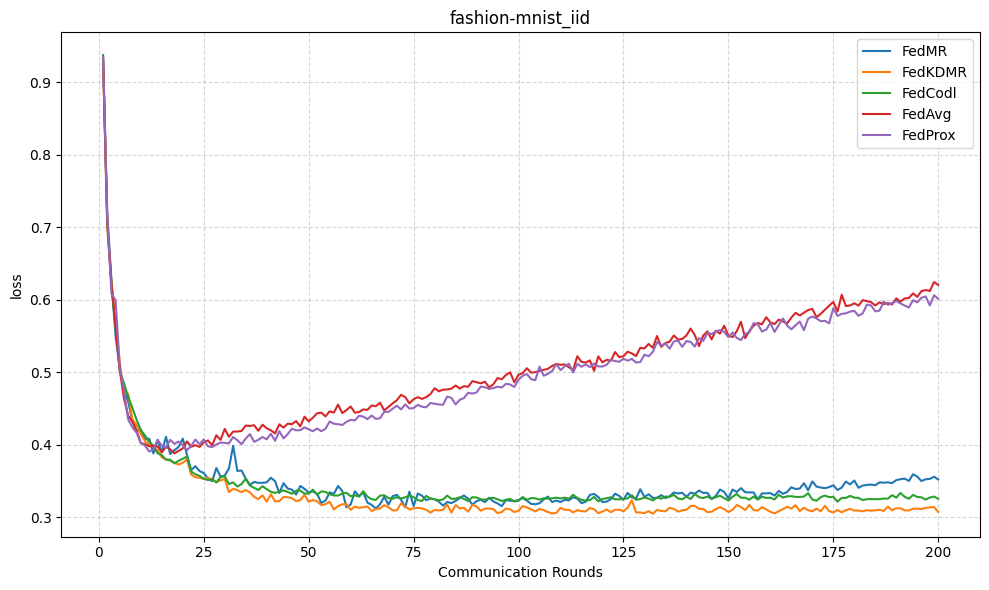

In [4]:
import matplotlib.pyplot as plt
from findfile import find_result_files
import os
import glob
file_dir='output/0'
save_dir = 'output/results/iid'
name= save_dir.split('/')[-1]
algorithms1=['FedKDMRV3'
             ,'FedAvg'
            ,'FedMR_'
            # ,'FedKDMRV3'
            # ,'FedKDMRV11'
            # ,'FedKDMRV12'
            # ,'FedKDMRV21'
            # ,'FedKDMRV22'
            ,'FedCodl_'
            ,'FedProx'
            # ,'FedExP'
            # ,'FedMRwG'
            # ,'FedKDMR_d'
            # ,'Fed2WKDMRV3'
            # ,'Fed2Codl_revise'
           ]
other1=['fashion-mnist_','test_loss','pre_50','KD_0.5',]
# algorithms2=['FedAvg'
#             # ,'FedKDMRV21'
#              ,'FedMR'
#              # ,'FedKDMRV3'
            
#            ]
# other2=['cifar10_','test_loss','pre_50']
file_list1=find_result_files(file_dir,algorithms1,other1)
# file_list2=find_result_files(file_dir,algorithms2,other2)
# file_list=file_list1+file_list2
file_list=file_list1

if not os.path.exists(save_dir):
    os.makedirs(save_dir)  


filename = f"{other1[0].strip('_')}_{other1[1]}_{name}.pdf"
save_path = os.path.join(save_dir, filename)
order= ['FedMR','FedKDMR','FedCodl','FedAvg','FedProx']
def get_priority(filename):
    for i, key in enumerate(order):
        if key in filename:
            return i
    return len(order)
file_list.sort(key=get_priority)


plt.figure(figsize=(10, 6))


for file_path in file_list:
    
    with open(file_path, 'r') as file:
        data = file.read().strip().split()
    
    
    base_label = file_path.split('_')[1]  
    label = base_label
    if 'FedKDMR' in file_path and 'KD_' in file_path and 'T_' in file_path:
        try:
            
            # kd_idx = file_path.find('KD_') + 3
            # t_idx = file_path.find('T_') + 2
            base_label = 'FedKDMR'
            
            # kd_value = file_path[kd_idx: file_path.find('_', kd_idx)]
            # t_value = file_path[t_idx: file_path.find('.', t_idx) + 2]  
            # label = f"{base_label} (KD={kd_value}, T={t_value})"
            label = f"{base_label}"
        except:
            pass  # 如果提取失败保持原标签
    accuracy = [float(x) for x in data[1:]]  
    rounds = range(1, len(accuracy) + 1)
    
    plt.plot(rounds, accuracy, marker='', linestyle='-', linewidth=1.5, label=label)


plt.title(f"{other1[0].strip('_')}_{name}")
plt.xlabel('Communication Rounds')
plt.ylabel('loss')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()  # 显示图例
plt.tight_layout()

plt.savefig(save_path, format='pdf', bbox_inches='tight')
print(f"saved: {save_path}")

plt.show()

['output/5/0.5/cifar100_FedMR_resnet20_test_loss_2000_lr_0.01_2025_05_06_20_20_55_frac_0.1_100_pre_50_KD_0.5_T_2.0.txt', 'output/5/0.5/cifar100_FedKDMRV3_resnet20_test_loss_2000_lr_0.01_2025_05_07_01_20_27_frac_0.1_100_pre_50_KD_0.5_T_2.0.txt', 'output/5/0.5/cifar100_FedCodl_resnet20_test_loss_2000_lr_0.01_2025_05_07_06_49_32_frac_0.1_100_pre_50_KD_0.5_T_2.0.txt']
图表已保存至: output/results/noniid/cifar100_test_loss_noniid_0.5_3.pdf


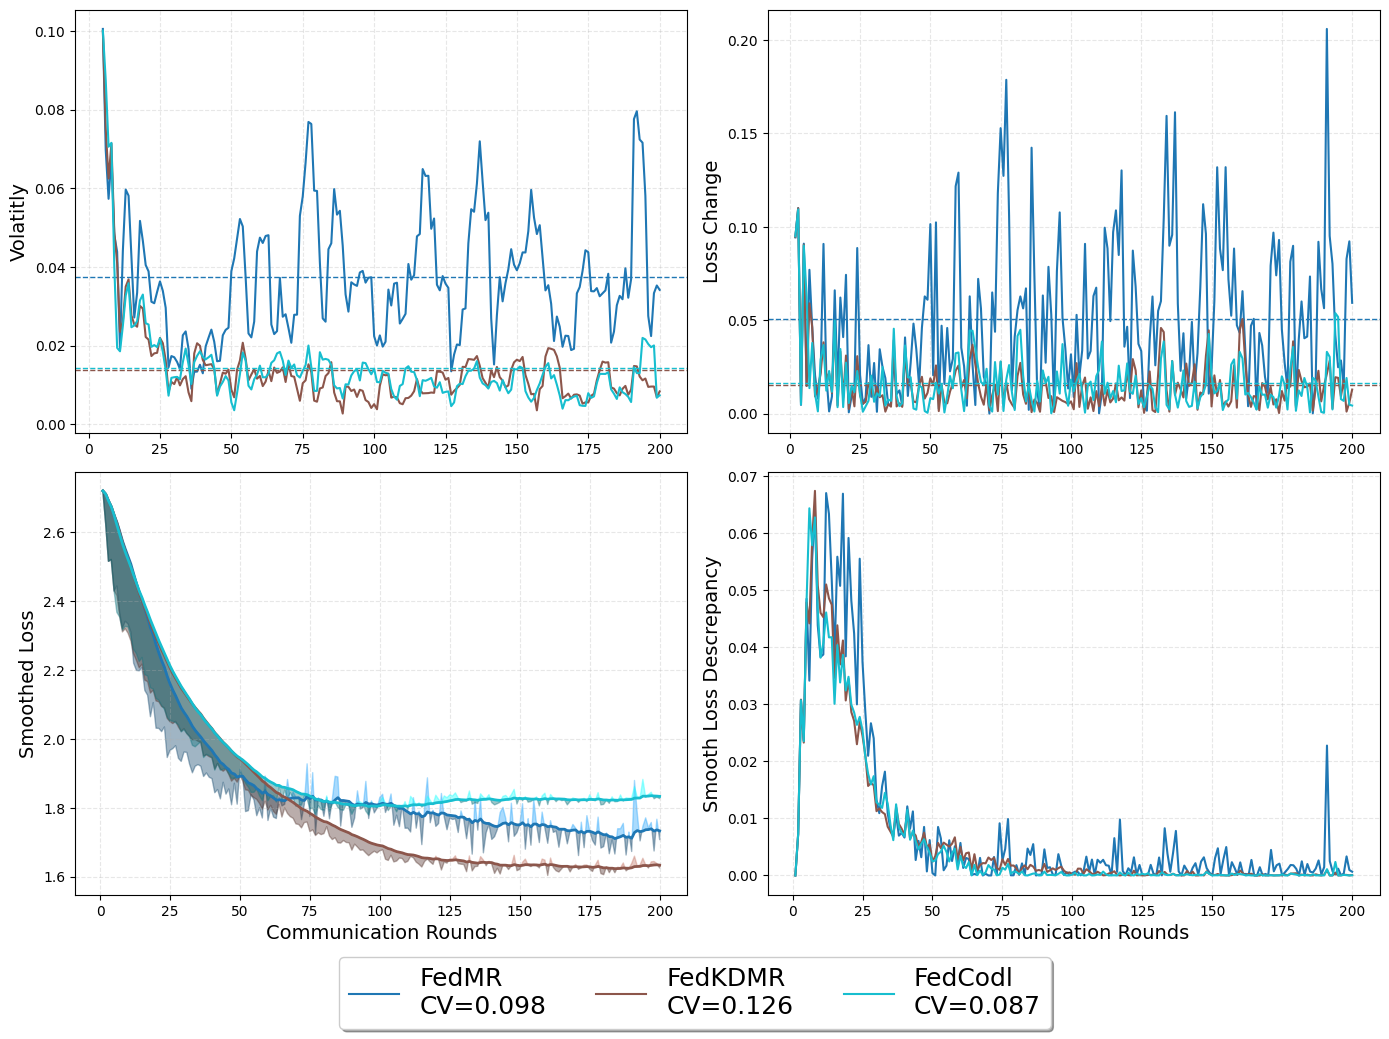

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from findfile import find_result_files
from scipy.ndimage import gaussian_filter1d
import glob
import os
from matplotlib import colors as mcolors
 
file_dir='output/5/0.5'
save_dir = 'output/results/noniid'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
name= save_dir.split('/')[-1]+'_'+file_dir.split('/')[-1]
# name= save_dir.split('/')[-1]
algorithms1=['FedKDMRV3'
             # ,'FedAvg'
            ,'FedMR_'
            # ,'FedKDMRV3'
            # ,'FedKDMRV11'
            # ,'FedKDMRV12'
            # ,'FedKDMRV21'
            # ,'FedKDMRV22'
            ,'FedCodl_'
            # ,'FedProx'
            # ,'FedExP'
            # ,'FedMRwG'
            # ,'FedKDMR_d'
            # ,'Fed2WKDMRV3'
            # ,'Fed2Codl_revise'
           ]
other1=['cifar100_','test_loss','pre_50','KD_0.5_T_2.0']
algorithms2=['FedMR'
            # ,'FedKDMRV21'
             # ,'FedAvg'
             # ,'FedKDMRV3'
            
           ]
other2=['cifar10_','test_loss','pre_50']
file_list1=find_result_files(file_dir,algorithms1,other1)
# file_list2=find_result_files(file_dir,algorithms2,other2)
# file_list=file_list1+file_list2
file_list=file_list1
print(file_list)
num=len(file_list)
# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18), sharex=True)
filename = f"{other1[0].strip('_')}_{other1[1]}_{name}_{num}.pdf"
save_path = os.path.join(save_dir, filename)
order= ['FedMR','FedKDMR','FedCodl','FedAvg','FedProx']
def get_priority(filename):
    for i, key in enumerate(order):
        if key in filename:
            return i
    return len(order)
file_list.sort(key=get_priority)

def adjust_lightness(color, amount=1.0):
    if isinstance(color, (tuple, list)) and len(color) >= 3:
        c = color[:3]
    else:
        c = mcolors.to_rgb(color)
    return tuple(max(min(ci * amount, 1.0), 0.0) for ci in c)


window_size = 5
smoothing_factor = 0.1


fig, axs = plt.subplots(2, 2, figsize=(14, 10))  
ax1, ax2, ax3, ax4 = axs.flatten()


colors = plt.cm.tab10(np.linspace(0, 1, len(file_list)))


legend_handles = []
legend_labels = []
cv_values = []


for idx, file_path in enumerate(file_list):
    
    with open(file_path, 'r') as file:
        data = file.read().strip().split()
    loss = [float(x) for x in data[1:]]  
    rounds = range(1, len(loss) + 1)
    
    
    loss_array = np.array(loss)
    cv = np.std(loss_array) / np.mean(loss_array)
    cv_values.append(f"{cv:.3f}")  
    
   
    base_label = file_path.split('_')[1]
    label = base_label
    if 'FedKDMR' in file_path and 'KD_' in file_path and 'T_' in file_path:
        try:
            # kd_idx = file_path.find('KD_') + 3
            # t_idx = file_path.find('T_') + 2
            # kd_value = file_path[kd_idx: file_path.find('_', kd_idx)]
            # t_value = file_path[t_idx: file_path.find('.', t_idx) + 2]
            # label = f"{base_label} (KD={kd_value}, T={t_value})"
            base_label = 'FedKDMR'
            label = f"{base_label}"
        except:
            pass
    
    
    line, = ax1.plot([], [], color=colors[idx], linewidth=1.5, label=label)
    legend_handles.append(line)
    legend_labels.append(label)
    
    # ========== 1. Loss Variance/Volatility ==========
    # rolling_variance = []
    # for i in range(len(loss) - window_size + 1):
    #     window = loss[i:i+window_size]
    #     rolling_variance.append(np.var(window))
    
    # ax1.plot(rounds[window_size-1:], rolling_variance, 
    #          color=colors[idx], linewidth=1.5)
    rolling_std = []
    for i in range(len(loss) - window_size + 1):
        window = loss[i:i+window_size]
        rolling_std.append(np.std(window))
    
    avg_rolling_std = np.mean(rolling_std)
    
    
    ax1.plot(rounds[window_size-1:], rolling_std, 
             color=colors[idx], linewidth=1.5)
    
    
    ax1.axhline(y=avg_rolling_std, color=colors[idx], linestyle='--', linewidth=1)
    # ========== 2. Round-to-Round Loss Change ==========
    delta_loss = np.abs(np.diff(loss))
    mean_delta = np.mean(delta_loss)
    
    ax2.plot(rounds[1:], delta_loss, color=colors[idx], linewidth=1.5)
    ax2.axhline(y=mean_delta, color=colors[idx], linestyle='--', linewidth=1)
    
    # ========== 3. Smoothed Convergence Trends ==========
    smoothed_loss = [loss[0]]
    for t in range(1, len(loss)):
        smoothed = smoothing_factor * loss[t] + (1-smoothing_factor) * smoothed_loss[t-1]
        smoothed_loss.append(smoothed)
    
    ax3.plot(rounds, smoothed_loss, color=colors[idx], linewidth=2)
    dark_c = adjust_lightness(colors[idx], 0.6)
    light_c = adjust_lightness(colors[idx], 1.4)
    
    smoothed_loss = np.asarray(smoothed_loss)
    loss = np.asarray(loss)
    ax3.fill_between(rounds, loss, smoothed_loss, where=(smoothed_loss >= loss),
                    interpolate=True, color=dark_c, alpha=0.4)
    ax3.fill_between(rounds, loss, smoothed_loss, where=(smoothed_loss < loss),
                    interpolate=True, color=light_c, alpha=0.4)
    
    # ========== 4. Squared Error ==========
    squared_deviation = (np.array(loss) - np.array(smoothed_loss)) ** 2
    # squared_deviation = [(s - l) ** 2 for s, l in zip(smoothed_loss, loss)]
    
    # avg_abs_deviation = np.mean(abs_deviation)
    
    # ax4.plot(rounds, abs_deviation, 
    #          color=colors[idx], linewidth=1.5)
    ax4.plot(rounds,  squared_deviation, 
             color=colors[idx], linewidth=1.5)


legend_text = [f"{label}\nCV={cv}" for label, cv in zip(legend_labels, cv_values)]

ncol = len(legend_handles)
legend = fig.legend(legend_handles, legend_text,
                   loc='upper center',
                   bbox_to_anchor=(0.5, 0.05),
                   ncol=ncol,
                   frameon=True,
                   fancybox=True,
                   shadow=True,
                   fontsize=18)

# ax1.set_title(' (Rolling Window Variance)')
# ax1.set_title(f'Loss Volatility(Rolling Standard Deviation, Window Size={window_size})',fontsize=14)
ax1.set_ylabel('Volatitly',fontsize=14)
# ax1.set_ylim(0.00001,0.08)
ax1.grid(True, linestyle='--', alpha=0.3)

# ax2.set_title('Round-to-Round Loss Change',fontsize=14)
ax2.set_ylabel('Loss Change',fontsize=14)
# ax2.set_ylim(0.00001,0.1)
ax2.grid(True, linestyle='--', alpha=0.3)

# ax3.set_title('Smoothed Convergence Trends',fontsize=14)
ax3.set_xlabel('Communication Rounds',fontsize=14)
ax3.set_ylabel('Smoothed Loss',fontsize=14)
ax3.grid(True, linestyle='--', alpha=0.3)

# ax4.set_title('||S_t-l_t||^2',fontsize=14)
ax4.set_xlabel('Communication Rounds',fontsize=14)
ax4.set_ylabel('Smooth Loss Descrepancy',fontsize=14)
ax4.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)  
plt.savefig(save_path, format='pdf', bbox_inches='tight')
print(f"saved: {save_path}")
plt.show()